<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Project 1: Linear Regression & KNN Regressor</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=======================================================</h2>

<h2> Weight: <font color='red'>50pts</font</h2>
    
 <h2>Due Date: <font color='red'>Feb. 14th by COB</font</h2>

<hr style="height:3.2px;border:none;color:#333;background-color:#333;" />

<h3> Cadet Name: Hunter Ray</h3> 
<br>
<h3>Date: 14 February 2020 </h3> 

<br>

<font color='black' size='3'> <b> MY DOCUMENTATION IDENTIFIES ALL SOURCES USED AND ASSISTANCE RECEIVED IN THIS ASSIGNMENT
<br>

<h3> Signature/Initials: HR</h3> 

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

<h2>Description of Project</h2>

In this project you will be working with the `incurance` dataset contained in the folder. The `insurance` dataset contains information of different people, and based on this information how much the insurance compay charges them. The ultimate goal is to predict the insurance charges for new people based on the historical information collected about each person. The features that have been collected are: `age, sex, bmi, children, smoker,` and `region`. 

You are provided with two separate sets: `insurance_train` which you will use to train your model and `insurance_test` which you will use to generate the predictions. Once you generate the predictions, you should save the results on an excel file and submit that to me. 

The project will be broken into two main parts: The <b>Analysis</b> and <b> Best Model</b> portions.

<h3>Analysis</h3>

The <b>Analysis</b> portion is worth <b>30pts</b>.

For this portion of the project you will be evaluated on the overall analysis of the dataset.

The rough point breakdown is as follows:

<ul>
<li>A one or two pargraph explaining what the project is about, what are the results, and the methodology: <b>10pts</b></li>

<li>Thoroughly addressing all the questions and completing all the required tasks: <b>10pts </b></li>

<li> Creativity and quality of Python code and explanation of the step-by-step code/work:<b> 10pts</b></li>
</ul>

<h4>Tasks</h4>

<ul>
    <li> Data Preprocessing: Explain how you are handling the missing data, are you scaling the data and why?</li>
    
   <li> Conduct exploratory analysis, and briefly summarize your observations and findings. Exploring your data using a variety of visual tools counts as part of exploratory analysis.</li>
        
   <li> Explain how you handled each of the qualitative features. </li>
   
   <li> What model did you pick and why? At this stage only choose between KNN Regressor and Linear Regression</li>
   
   <li>Explain the type of relationship(linear vs. non-linear) between features and response variable, and how you came to your conclusions. </li>
   
   <li> Obtain a measure of your model's variability and prediction power. Explain your method and results.</li>
   
    
 </ul>

<h3>Best Model</h3>

The <b>Best Model</b> portion is worth <b>20pts</b>.

For this portion you will exclusively be evaluated on the predictive power of your model. In this portion you will be competing with the rest of your peers for the top score. The scores will be, roughly, distributed according to the following scheme:



There are two instances where there may be significant deviations from the above grading scheme:





<table>
  <tr>
    <th>Points</th>
    <th>Criteria</th>

  </tr>
  <tr>
    <td>18-20</td>
    <td>Highest R2 Score</td>
   
  </tr>
  <tr>
    <td>17-19</td>
    <td>.25 StDevs of highest R2 score</td>
   
  </tr>
  <tr>
    <td>15-16</td>
    <td>.5 StDevs of highest R2 score</td>
  
  </tr>
  <tr>
    <td>13-14</td>
    <td>.75 StDevs of highest R2 score</td>
  
  </tr>
  <tr>
    <td>11-12</td>
    <td>1.25 StDevs of highest R2 score</td>

  </tr>
  <tr>
    <td>10</td>
    <td>1.75 StDevs of highest R2 score</td>
   
  </tr>
  <tr>
    <td>9</td>
    <td>2 StDevs of highest R2 score</td>
   
  </tr>
   <tr>
    <td>7-8</td>
    <td> 2+ StDevs of highest R2 score</td>
   
  </tr>
</table>



<ul>
  <li> If a student's model achieves an R2 score that is at least as high as the R2 score achieved by the model build by the instructor, then you will automatically get a $20$</li>
  <li> If the highest R2 score by a student is signigicantly smaller than the R2 score achieved by the model built by the instructor, the insturctor reserves the right to assign a max score that is significantly lower than what is stated in the grading scheme above. In this situation the rest of the scores will also be adjusted accordingly.</li>
 </ul>
 
 <h3>How to Submit?</h3>
 
 All of your work should be done in a single JupyterNotebook. You will submit to me via email a total of two files. One will be the JupyterNotebook which contains your whole work. The second file should be an excel file containing ONLY the predictions of your model on the test set `insurance_test`.

In [149]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,female,24.130,1,yes,northwest,23887.66270
1,46.0,male,43.890,3,no,southeast,8944.11510
2,46.0,male,19.855,0,no,northwest,7526.70645
3,37.0,female,NaN,2,no,southwest,6311.95200
4,62.0,female,29.920,0,no,southeast,13457.96080


In [76]:
#the purpose of this project is to take a data set containing explanatory variables that relate to the target variable 
#and generate the best prediction model. This prediction model will then be used to generate predictions
#on a new data set and judged for accuracy. In the context of this problem we are trying to create a a model that predicts 
#how much an insurance company should charge customers based on their age, sex, bmi, children, smoker, and region. This 
#is relevant work done by actuaries in the real world that, if applied well, could save the insurance company money by 
#allocating the right charges to the right individuals and avoid overcharging which could lead to client loss or 
#undercharging which leaves momney on the table for the insurance company.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score, ShuffleSplit,  KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score

In [3]:
#importing the datasets
df_train=pd.read_csv('insurance_train.csv')
df_test=pd.read_csv('insurance_test.csv')

In [4]:
#check the head of the data
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,52.0,female,24.130,1,yes,northwest,23887.66270
1,46.0,male,43.890,3,no,southeast,8944.11510
2,46.0,male,19.855,0,no,northwest,7526.70645
3,37.0,female,NaN,2,no,southwest,6311.95200
4,62.0,female,29.920,0,no,southeast,13457.96080


In [5]:
df_test.head()

,age,sex,bmi,children,smoker,region
0,59,male,26.400,0,no,southeast
1,59,female,31.350,0,no,northwest
2,52,female,37.400,0,no,southwest
3,46,male,33.345,1,no,northeast
4,19,female,28.900,0,no,southwest


In [6]:
#I handled the qualitative features 'smoker' and 'sex' by converting these variables with 2 unique values into 
#boolean responses.
#smoker yes=1 ; smoker no=0
#male=1 ; female=0
df_train['smoker']=df_train['smoker'].apply(lambda x: 1 if x=='yes' else 0)
df_train['sex']=df_train['sex'].apply(lambda x: 1 if x=='male' else 0)
df_test['smoker']=df_test['smoker'].apply(lambda x: 1 if x=='yes' else 0)
df_test['sex']=df_test['sex'].apply(lambda x: 1 if x=='male' else 0)

In [7]:
#I handled the qualitative feature 'region' by turning the region column into 4 seperate columns for each region 
#with boolean responses.
df_train=pd.get_dummies(df_train,columns=['region'],drop_first=False)
df_test=pd.get_dummies(df_test,columns=['region'],drop_first=False)

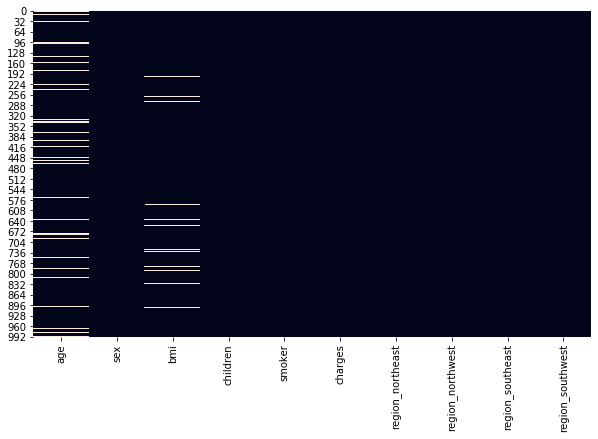

In [8]:
#check for null values
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull()==True,cbar=False)

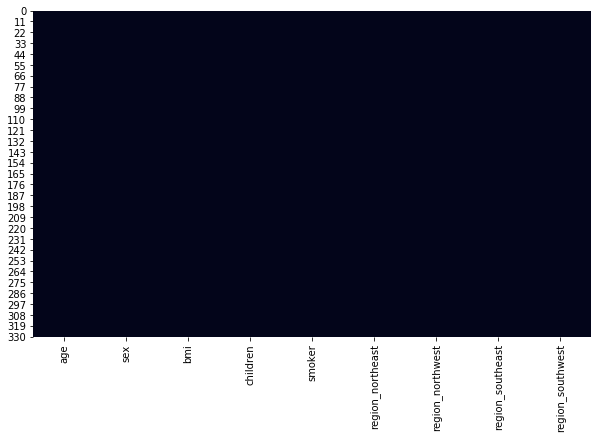

In [10]:
#check for null values 
plt.figure(figsize=(10,6))
sns.heatmap(df_test.isnull()==True,cbar=False)

In [74]:
#In the following section of code you can see that I am inputing the missing values with the mean of all of the other 
#values in that column.

In [10]:
#replacing the rows with missing data with the mean of those columns
df_train['age'].fillna(value=df_train['age'].mean(),inplace=True)
df_train['bmi'].fillna(value=df_train['bmi'].mean(),inplace=True)
df_test['age'].fillna(value=df_test['age'].mean(),inplace=True)
df_test['bmi'].fillna(value=df_test['bmi'].mean(),inplace=True)

In [11]:
df_train.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,52.0,0,24.130000,1,1,23887.66270,0,1,0,0
1,46.0,1,43.890000,3,0,8944.11510,0,0,1,0
2,46.0,1,19.855000,0,0,7526.70645,0,1,0,0
3,37.0,0,30.630425,2,0,6311.95200,0,0,0,1
4,62.0,0,29.920000,0,0,13457.96080,0,0,1,0


In [ ]:
#The following chunk of code is used to create plots comparing each explanatory variable to the target variable.

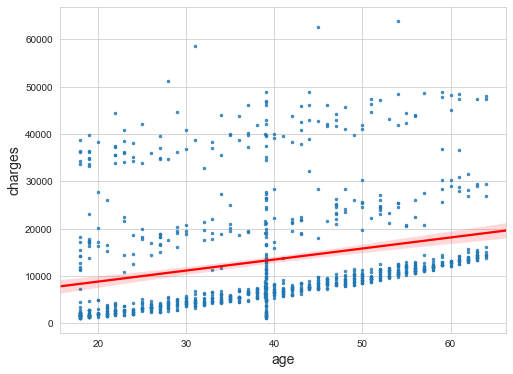

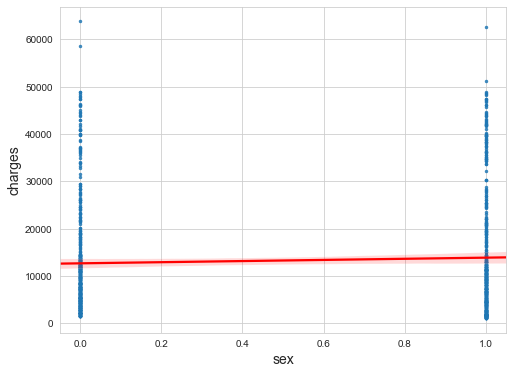

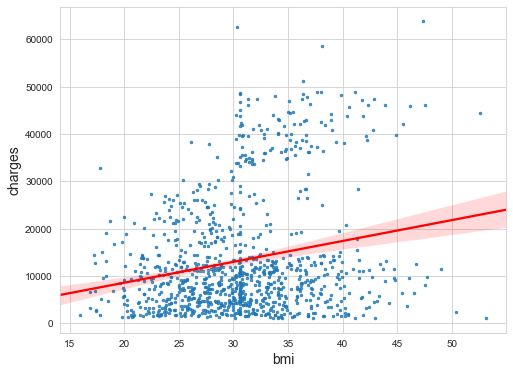

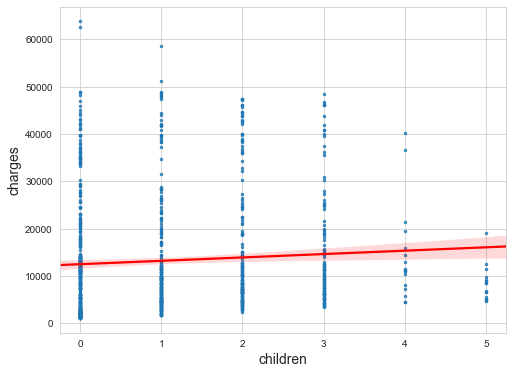

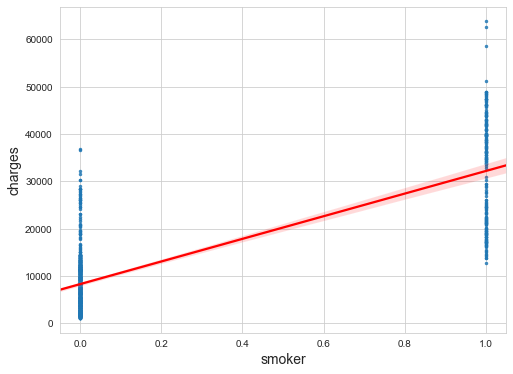

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.regplot(x='age',y='charges',data=df_train,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.xlabel('age',fontsize=14)
plt.ylabel('charges',fontsize=14)
plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.regplot(x='sex',y='charges',data=df_train,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.xlabel('sex',fontsize=14)
plt.ylabel('charges',fontsize=14)
plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.regplot(x='bmi',y='charges',data=df_train,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.xlabel('bmi',fontsize=14)
plt.ylabel('charges',fontsize=14)
plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.regplot(x='children',y='charges',data=df_train,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.xlabel('children',fontsize=14)
plt.ylabel('charges',fontsize=14)
plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.regplot(x='smoker',y='charges',data=df_train,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.xlabel('smoker',fontsize=14)
plt.ylabel('charges',fontsize=14)
plt.show()

In [ ]:
#in these plots it is clear that some explanatory variables are coorelated with the target varaible linearly
#(like smoker, age, and bmi) where as other variables do not show a strong linear relationship.

In [15]:
#split the training data
x=df_train.drop('charges',axis=1)
y=df_train['charges']

In [ ]:
#in the following steps I am scaling the data because there are several different variables measured with different scales.
#scaling the data will allow me to compare them all.

In [16]:
scaler=StandardScaler()

In [17]:
scaled=scaler.fit_transform(x)

In [27]:
mean=scaler.mean_
std=scaler.scale_

In [18]:
x_sc=pd.DataFrame(scaled,columns=x.columns)

In [19]:
x_sc.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.967770,-0.987122,-1.079867e+00,-0.069439,1.949113,-0.556237,1.828111,-0.616151,-0.590015
1,0.517557,1.013046,2.202713e+00,1.588841,-0.513054,-0.556237,-0.547013,1.622978,-0.590015
2,0.517557,1.013046,-1.790040e+00,-0.898580,-0.513054,-0.556237,1.828111,-0.616151,-0.590015
3,-0.157763,-0.987122,-2.950928e-15,0.759701,-0.513054,-0.556237,-0.547013,-0.616151,1.694871
4,1.718125,-0.987122,-1.180175e-01,-0.898580,-0.513054,-0.556237,-0.547013,1.622978,-0.590015


In [52]:
knn=KNeighborsRegressor(n_neighbors=50)
lg=LinearRegression()
lasso=Lasso(alpha=1.25)
ridge=Ridge(alpha=1.25)

In [53]:
kf=KFold(n_splits=10,random_state=4,shuffle=True)
ss=ShuffleSplit(n_splits=10,test_size=0.2, random_state=2)

In [54]:
cv_knn=cross_validate(knn,x_sc,y,cv=ss,scoring={'r2'},return_estimator=True,return_train_score=True)
cv_lg=cross_validate(lg,x_sc,y,cv=5,scoring={'r2'},return_estimator=True,return_train_score=True)
cv_lasso=cross_validate(estimator=lasso,X=x_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2'})
cv_ridge=cross_validate(estimator=ridge,X=x_sc,y=y,cv=kf, return_estimator=True,
                        scoring={'r2'})

In [55]:
cv_knn['test_r2'].mean()

0.5603568170878443

In [56]:
cv_lg['test_r2'].mean()

0.7456852050538061

In [57]:
cv_lasso['test_r2'].mean()

0.7465164777569122

In [58]:
cv_ridge['test_r2'].mean()

0.7465198393605226

In [ ]:
#at this point I have decdided to use ridge regression for my model because it generated the highest mean r2 score among
#the four models. I am simply choosing the model with the highest mean r2 score because all I care about for this 
#analysis is predicting the target variable.
#the ridge regression model explaines 74.65% of the variability in the data set.

In [37]:
param_alpha=np.arange(0.0001,10,0.1)
kf=KFold(n_splits=5,shuffle=True, random_state=101)

In [38]:
r2_lasso,r2_ridge=[],[]

for param in param_alpha:
    lasso=Lasso(alpha=param)
    ridge=Ridge(alpha=param)
    
    r2_lasso.append(cv_lasso['test_r2'].mean())
    r2_ridge.append(cv_ridge['test_r2'].mean())
    

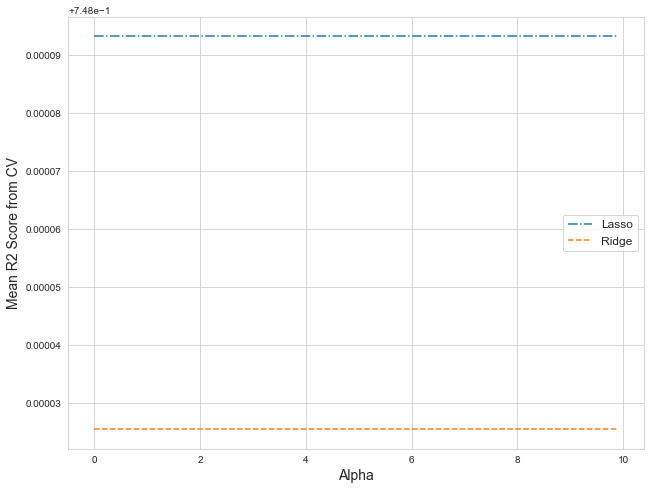

In [39]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(8,6))

axes=fig.add_axes([0,0,1,1])

axes.plot(param_alpha,r2_lasso, linestyle='-.',lw=1.5,label='Lasso')
axes.plot(param_alpha,r2_ridge,ls='--',lw=1.5,label='Ridge')

axes.set_xlabel("Alpha",fontsize=14)
axes.set_ylabel("Mean R2 Score from CV",fontsize=14)

plt.legend(fontsize=12)
plt.show()

In [40]:
df_test.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,59,1,26.400,0,0,0,0,1,0
1,59,0,31.350,0,0,0,1,0,0
2,52,0,37.400,0,0,0,0,0,1
3,46,1,33.345,1,0,1,0,0,0
4,19,0,28.900,0,0,0,0,0,1


In [59]:
model=Ridge(alpha=1.25)

In [60]:
model.fit(x_sc,y)

Ridge(alpha=1.25, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
x_test=(df_test-mean)/std

In [62]:
pred=model.predict(x_test)

In [67]:
df_pred=pd.DataFrame(pred,columns=['predicted charges'])

In [68]:
df_pred.head()

,predicted charges
0,10226.521847
1,13347.853377
2,13142.793687
3,11754.338669
4,1675.577913


In [69]:
df_pred.to_excel('mini project 1_predicted charges_ray.xlsx')